In [1]:
import numpy as np
import pandas as pd
import pystan
from scipy.stats import norm, multivariate_normal, invwishart, invgamma, bernoulli
from statsmodels.tsa.stattools import acf
import datetime
import sys
import os

from codebase.plot import * 
from codebase.data import * 
from codebase.file_utils import save_obj, load_obj

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
num_chains = 1
num_samples = 1000
num_warmup = 1000
num_iter = num_samples + num_warmup

In [79]:
log_dir0 = "./log/bin_sim_1factor/sim0/20191121_122115_bin_sim0_m3/"
data0 = load_obj('data', log_dir0)
ps0 = load_obj('ps', log_dir0)
print(data0['random_seed'])
ps0.keys()


0


dict_keys(['beta', 'alpha', 'zz', 'uu'])

In [91]:
log_dir = "./log/bin_sim_1factor/sim1/20191121_114054_bin_sim1_m2//"
data = load_obj('data', log_dir)
ps = load_obj('ps', log_dir)
print(data['random_seed'])
ps.keys()

0


dict_keys(['beta', 'alpha', 'zz', 'uu', 'Omega'])

In [92]:
data

{'noise': True,
 'random_seed': 0,
 'N': 1000,
 'K': 1,
 'J': 6,
 'alpha': array([-0.53,  0.35, -1.4 , -1.4 , -0.96, -2.33]),
 'beta': array([0.9  , 0.7  , 1.71 , 1.018, 1.96 , 1.37 ]),
 'z': array([ 1.76405235e+00,  4.00157208e-01,  9.78737984e-01,  2.24089320e+00,
         1.86755799e+00, -9.77277880e-01,  9.50088418e-01, -1.51357208e-01,
        -1.03218852e-01,  4.10598502e-01,  1.44043571e-01,  1.45427351e+00,
         7.61037725e-01,  1.21675016e-01,  4.43863233e-01,  3.33674327e-01,
         1.49407907e+00, -2.05158264e-01,  3.13067702e-01, -8.54095739e-01,
        -2.55298982e+00,  6.53618595e-01,  8.64436199e-01, -7.42165020e-01,
         2.26975462e+00, -1.45436567e+00,  4.57585173e-02, -1.87183850e-01,
         1.53277921e+00,  1.46935877e+00,  1.54947426e-01,  3.78162520e-01,
        -8.87785748e-01, -1.98079647e+00, -3.47912149e-01,  1.56348969e-01,
         1.23029068e+00,  1.20237985e+00, -3.87326817e-01, -3.02302751e-01,
        -1.04855297e+00, -1.42001794e+00, -1.7062

In [93]:
%%opts Layout [fig_size=200]
plots = []
for j in range(data['J']):
        plots.append(plot_trace(ps['beta'][:,j],
             true_value=data['beta'][j],
             title = 'Posterior distribution for beta(%s)'%(j)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

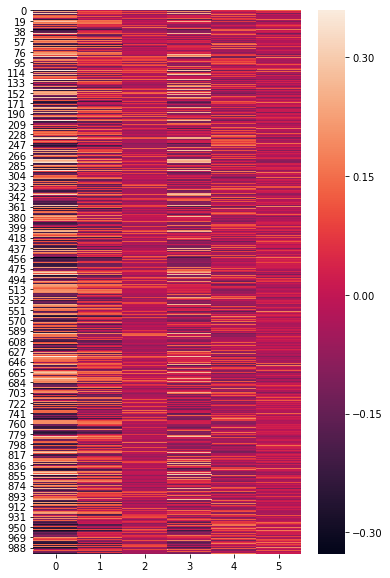

In [95]:
mu = np.mean(ps['uu'],0)
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu, cbar = True )

In [87]:
mu0 = np.mean(ps0['uu'],0)
print(np.round(np.mean(abs(mu0,0)*1e4, 2))
hv.Bars(np.mean(abs(mu0),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[-0.35  0.3   0.28  0.46  0.22 -0.69]


:Bars   [x]   (y)

In [96]:
print(np.round(np.mean(abs(mu),0)*1e4, 2))
hv.Bars(np.mean(abs(mu),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[1749.72  984.77  500.94  971.01  698.15  438.72]


:Bars   [x]   (y)

In [27]:
np.mean(mu[:900],0) - np.mean(mu[900:],0)

array([-0.00031889,  0.00019727,  0.00035571, -0.00099919, -0.00137463,
       -0.0012094 ])

In [28]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    

In [76]:
# y = np.zeros_like(data['D'])
# y[900:,3:] = 1
# y = y.flatten()

y = np.zeros(data['N'])
y[900:] = 1
y = y.flatten()


In [77]:
mu2 = np.mean(ps['uu']**2,0)
a1 = np.mean(mu,1)**2
a2 = np.empty_like(mu2)
for i in range(data['N']):
    a2[i] = mu2[i] - a1[i]
a3 = np.sum(a2,1)

In [49]:
# a1 = np.mean(mu, axis=1)
# # mu2 = np.mean(ps['uu']**2,0)
# # a1 = mu/np.sqrt(mu2 - mu**2)
# # a1 = mu
# a2 = a1/(1+a1)
# a2 = a2.flatten()
# a2

array([0.49572583, 0.50232247, 0.50875047, ..., 0.48402193, 0.48739672,
       0.50183744])

AUC: 0.52


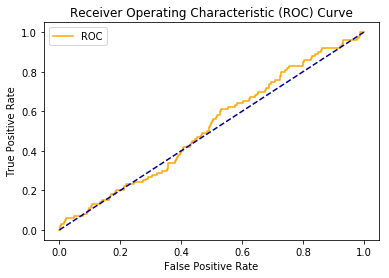

In [78]:
auc = roc_auc_score(y, a3)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y, a3)
plot_roc_curve(fpr, tpr)


## Residual Analysis

In [12]:
# %%opts Bars {+axiswise} [width=1000, height=300, ] 
res = pd.DataFrame(np.mean(abs(np.mean(ps['uu'], 0)),1))
res.columns = ['avg_u']
res.reset_index(inplace=True)
res.sort_values('avg_u', ascending=False, inplace=True)
hv.Bars(res[:20],).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)


:Bars   [index]   (avg_u)